In [66]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [67]:
with open('C:/Users/kzadk/OneDrive/Desktop/YT_api_key.txt') as f:
    key = f.read()

api_key = key
api_service_name = 'youtube'
api_version = 'v3' 

youtube = build(api_service_name, api_version, developerKey=api_key)

channel_ids = ['UCCezIgC97PvUuR4_gbFUs5g', # Corey Shafer
               'UCcIXc5mJsHVYTZR1maL5l9w', # DeepLearningAI
               'UCr8O8l5cCX85Oem1d18EezQ', # DanielBourke
               'UCfzlCWGWYyIQ0aLC5w48gBQ', # Sentdex
               'UCtYLUTtgS3k1Fg4y5tAhLbw', # StatQuest
               'UCYO_jab_esuFRV4b17AJtAw' # 3Blue1Brown
               ]


### Function to get desired channels statistics

In [68]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part = 'snippet, contentDetails, statistics',
        id = ','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data

In [69]:
data = get_channel_stats(youtube, channel_ids)

In [70]:
len(data)

6

In [71]:
yt_data = pd.DataFrame(data)

In [72]:
yt_data

,Channel_name,Subscribers,Views,playlist_id
0,3Blue1Brown,5230000,341581155,UUYO_jab_esuFRV4b17AJtAw
1,StatQuest with Josh Starmer,940000,49797548,UUtYLUTtgS3k1Fg4y5tAhLbw
2,Corey Schafer,1140000,86156126,UUCezIgC97PvUuR4_gbFUs5g
3,Daniel Bourke,154000,7373230,UUr8O8l5cCX85Oem1d18EezQ
4,sentdex,1230000,109961541,UUfzlCWGWYyIQ0aLC5w48gBQ
5,DeepLearningAI,225000,14356491,UUcIXc5mJsHVYTZR1maL5l9w


In [73]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  6 non-null      object
 1   Subscribers   6 non-null      object
 2   Views         6 non-null      object
 3   playlist_id   6 non-null      object
dtypes: object(4)
memory usage: 320.0+ bytes


In [74]:
yt_data['Subscribers'] = pd.to_numeric(yt_data['Subscribers'])
yt_data['Views'] = pd.to_numeric(yt_data['Views'])

In [75]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  6 non-null      object
 1   Subscribers   6 non-null      int64 
 2   Views         6 non-null      int64 
 3   playlist_id   6 non-null      object
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes


### Showing plots for numerical data of channels

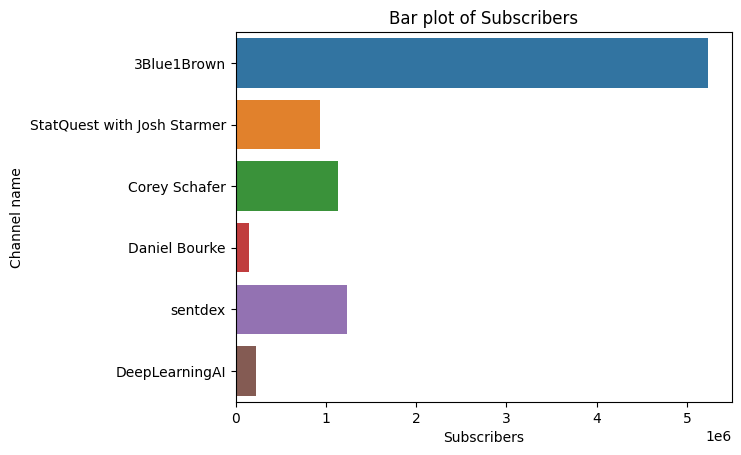

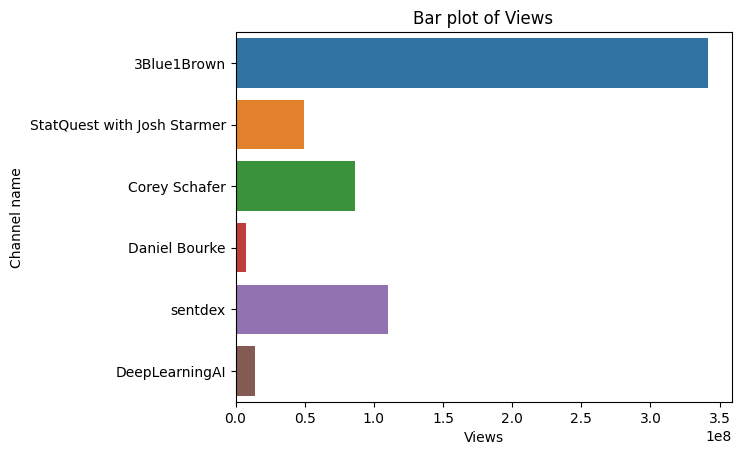

In [76]:
for column in yt_data.columns:
    if yt_data[column].dtype.kind in 'iufc':
        sns.barplot(x=yt_data[column], y=yt_data['Channel_name'])
        plt.xlabel(column)
        plt.ylabel('Channel name')
        plt.title(f'Bar plot of {column}')
        plt.show()

### Function to get ids of videos

In [102]:
playlist_id = yt_data.loc[yt_data['Channel_name'] == '3Blue1Brown', 'playlist_id'].iloc[0]

In [103]:
playlist_id

'UUYO_jab_esuFRV4b17AJtAw'

In [106]:
def get_channel_videos_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50)
    response = request.execute()

    videos_ids = []

    for i in range(len(response['items'])):
        videos_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                videos_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')
    return len(videos_ids)

In [107]:
get_channel_videos_ids(youtube, playlist_id)

129